In [21]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv(r"C:\Users\julik\sciebo\Arduino\Final\Data\Calibration\Processed\magneto_1.txt",delim_whitespace=True,names=["x","y","z","T"])

M_ainv =   np.array([ 1.056525, -0.003137, 0.006974, -0.003137 , 1.046448, -0.048931, 0.006974, -0.048931, 1.044091]).reshape(3,3)
M_B      =  np.array([6.524989, -48.468324, 38.056170])

df["x_cal"] = M_ainv[0,0]*(M_B[0]-df["x"])+M_ainv[0,1]*(M_B[1]-df["y"])+M_ainv[0,2]*(M_B[2]-df["z"])
df["y_cal"] = M_ainv[1,0]*(M_B[0]-df["x"])+M_ainv[1,1]*(M_B[1]-df["y"])+M_ainv[1,2]*(M_B[2]-df["z"])
df["z_cal"] = M_ainv[2,0]*(M_B[0]-df["x"])+M_ainv[2,1]*(M_B[1]-df["y"])+M_ainv[2,2]*(M_B[2]-df["z"])

In [28]:
df2 = pd.DataFrame()
df2["x"] = df["x_cal"]
df2["y"] = df["y_cal"]
df2["z"] = df["z_cal"]
np.savetxt(r"C:\Users\julik\sciebo\Arduino\mag_cal.txt",df2)

In [19]:
fig = px.scatter_3d(df, x='x', y='y', z='z',title="1")               
fig.update_traces(marker_size = 4)
fig.show()


In [14]:
fig = px.scatter_3d(df, x='x_cal', y='y_cal', z='z_cal',title="1")        
fig.update_traces(marker_size = 4)
fig.show()

In [15]:
df.describe()

,x,y,z,T,x_cal,y_cal,z_cal
count,972.000000,972.000000,972.000000,0.0,972.000000,972.000000,972.000000
mean,22.091358,-47.041358,37.319136,NaN,-16.436642,-1.480478,0.730794
std,25.751120,26.606480,26.840339,NaN,27.205800,27.773814,27.956190
min,-30.000000,-95.400000,-7.260000,NaN,-59.372631,-48.150857,-48.839377
25%,3.112500,-69.937500,15.187500,NaN,-40.084301,-26.303431,-22.746420
50%,23.025000,-45.900000,37.750000,NaN,-17.294534,-3.111137,0.100573
75%,44.437500,-24.000000,60.080000,NaN,3.553089,22.189181,23.895935
max,62.700000,-2.250000,84.940000,NaN,38.568523,49.131142,47.707968


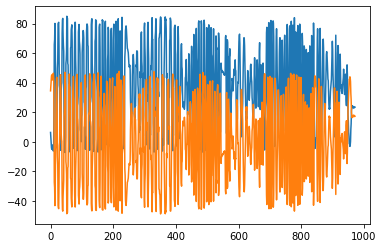

In [24]:
plt.plot(df["z"])
plt.plot(df["z_cal"])